In [1]:
import nsfg
import first
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import pandas as pd
import analytic

In [2]:
df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
# cdf = 

In [3]:
df.head(5)

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [4]:
df.describe()

,time,sex,weight_g,minutes
count,44.000000,44.000000,44.000000,44.000000
mean,1296.000000,1.590909,3275.954545,788.727273
std,690.704561,0.497350,528.032458,416.066931
min,5.000000,1.000000,1745.000000,5.000000
25%,792.750000,1.000000,3141.500000,482.750000
50%,1406.500000,2.000000,3404.000000,846.500000
75%,1918.500000,2.000000,3571.750000,1158.500000
max,2355.000000,2.000000,4162.000000,1435.000000


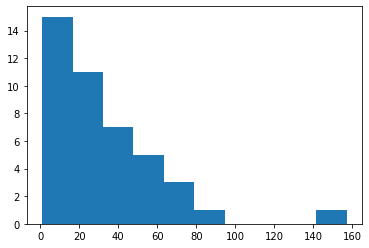

In [5]:
# just taking a look at the distribution...
plt.hist(diffs, bins=10)
plt.show()

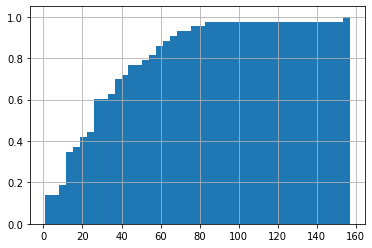

In [6]:
diffs.hist(density=1, cumulative=True, bins=44)
plt.show()

In [7]:
# calculating the cdf myself for fun
def get_percentile_rank(pd_series):
    test = pd_series.value_counts(normalize=True)
    return test

def get_cdf(pd_series):
    prb = get_percentile_rank(pd_series)
    return np.cumsum(prb.sort_index())

my_cdf = get_cdf(diffs)
my_cdf.head(5)

1.0     0.023256
2.0     0.116279
4.0     0.139535
9.0     0.186047
13.0    0.232558
Name: minutes, dtype: float64

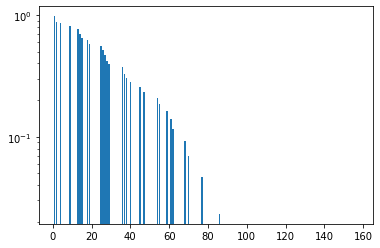

In [8]:
# this didnt really work (sticking to documentation)
cdf_all_vals = np.array([my_cdf[val] for val in diffs.dropna()])
plt.bar(diffs.dropna().values, 1-cdf_all_vals)
plt.yscale('log')

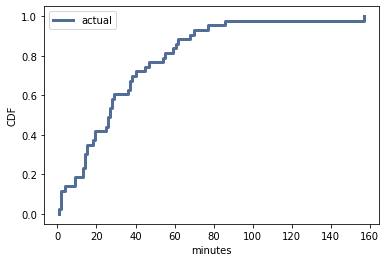

<Figure size 576x432 with 0 Axes>

In [9]:
cdf = thinkstats2.Cdf(diffs, label='actual')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF')

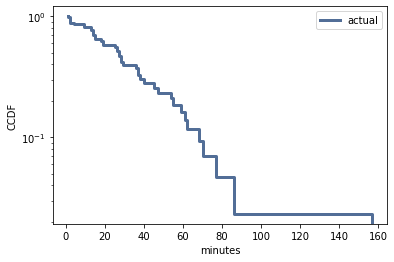

<Figure size 576x432 with 0 Axes>

In [10]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='minutes', ylabel='CCDF', yscale='log')

In [11]:
import scipy.stats as stats

In [12]:
rand_norm_vals = np.random.normal(loc=1, scale=0.5, size=1000)
rand_norm_vals2 = np.random.normal(loc=2, scale=0.4, size=1000)
rand_norm_vals3 = np.random.normal(loc=3, scale=0.3, size=1000)

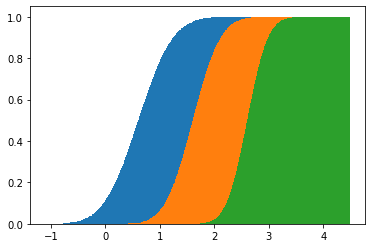

In [13]:
plt.bar(rand_norm_vals, stats.norm.cdf(rand_norm_vals, loc=1, scale=.5))
plt.bar(rand_norm_vals2, stats.norm.cdf(rand_norm_vals2, loc=2, scale=.4))
plt.bar(rand_norm_vals3, stats.norm.cdf(rand_norm_vals3, loc=3, scale=.3))
plt.show()

In [14]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()
weights_adj = weights[weights.between(weights.quantile(.01), weights.quantile(.99))]

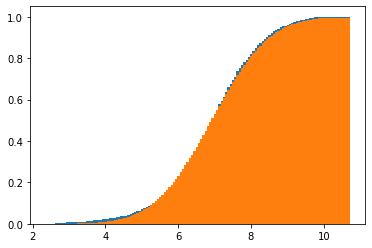

In [15]:
u = weights_adj.mean()
sigma = weights_adj.std()

weights_cdf = get_cdf(weights_adj)
# actual
plt.bar(weights_adj, np.array([weights_cdf[val] for val in weights_adj.dropna()]))
# model
plt.bar(weights_adj, stats.norm.cdf(weights_adj, loc=u, scale=sigma))
plt.show()

In [16]:
weights_adj.mean()

7.2815674379232505

Mean, Var 7.280883100022579 1.5452125703544901
Sigma 1.2430657948614345


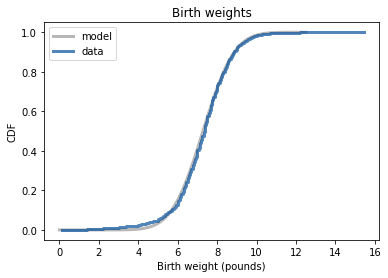

In [17]:
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
print('Mean, Var', mu, var)
    
# model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# actual data
cdf = thinkstats2.Cdf(weights, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Birth weights',
                 xlabel='Birth weight (pounds)',
                 ylabel='CDF')

In [18]:
def make_normal_plot(weights):
    mean = weights.mean()
    std = weights.std()
    
    xs = [-4, 4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color='gray', label='model')
    
    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='birth weights')

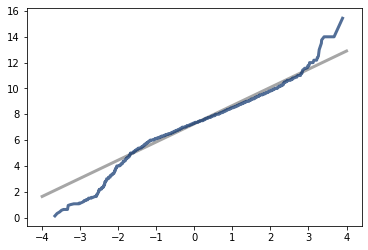

In [19]:
make_normal_plot(weights)

In [20]:
import random

def expovariate(lam):
    p = random.random()
    x = -np.log(1-p) / lam
    return x

In [21]:
import brfss
df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

In [22]:
df

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
...,...,...,...,...,...,...
414504,23.0,1,84.090909,43.439320,88.64,191.0
414505,49.0,2,70.454545,6.216538,72.73,170.0
414506,45.0,1,86.363636,20.617560,90.91,178.0
414507,52.0,2,89.090909,11.188138,89.09,157.0


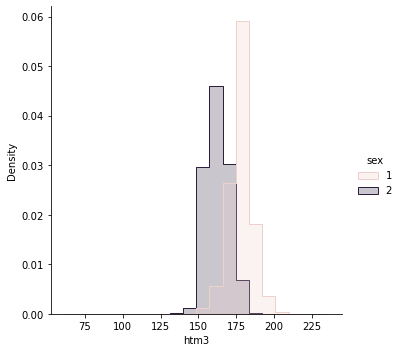

In [23]:
import seaborn as sns
sns.displot(df, x="htm3", hue="sex", bins=20, stat='density',\
            common_norm=False, element="step")
plt.show()

<AxesSubplot:>

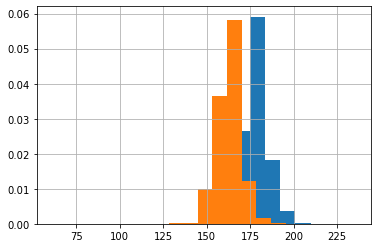

In [24]:
# not sure i understand the discrepancy in y values
# in matplotlib/sns plots bin size maybe?

male_heights = df[df.sex==1].htm3
female_heights = df[df.sex==2].htm3

male_heights.hist(bins=20, density=1)
female_heights.hist(bins=20, density=1)

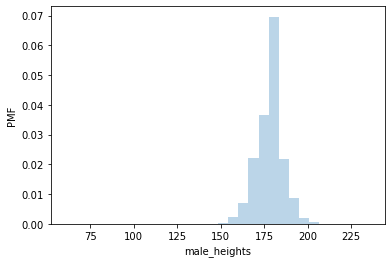

In [25]:
plt.hist(male_heights, bins=30, density=1, alpha=.3)
plt.xlabel('male_heights')
plt.ylabel('PMF')
plt.show()

In [26]:
upper_bound = 185.42
lower_bound = 177.79

In [27]:
below_upper = stats.norm.cdf(upper_bound, loc=male_heights.mean(), scale=male_heights.std())
below_lower = stats.norm.cdf(lower_bound, loc=male_heights.mean(), scale=male_heights.std())
between_upper_and_lower = round((below_upper - below_lower)*100, 2)
print('about {}% of the male population is tall enough to be a blue man'.format(between_upper_and_lower))

about 34.37% of the male population is tall enough to be a blue man
